# Generate Accuracy Points

There are a number of ways to generate reference points:

 * Random - n points are just randomly distributed across the scene. However, classes with only a small area mapped might be missed. 
 * Stratified - n random points per class. However, the distribution of points is not related to areas mapped.
 * Proportional Stratified - min n points per class but total number of points per-class is proportional to the area mapped.

## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_

# 1. Import Modules

In [1]:
import os

# Import the geopandas module - used for visualisation.
import geopandas

# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import the rsgislib classification module
import rsgislib.classification

# Import the rsgislib.mapping module for visualisation
import rsgislib.tools.mapping

# 2. Define Base Classification

We will use the Extra Trees reflectance classification as the base classification on which the points will be generated.

In [2]:
cls_img = os.path.join("cls_refl_results", "cls_et_refl.kea")

# Input Sentinel-2 image file with 20 m resolution pixels - just needed for visualisation
input_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif"

# 3. Create Output Directory

In [3]:
out_dir = "acc_pts"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

# 4. Generate Random Points

In [4]:
ran_pts_vec_file = os.path.join(out_dir, "cls_acc_pts_random.geojson")
ran_pts_vec_lyr = "cls_acc_pts_random"
rsgislib.classification.generate_random_accuracy_pts(
    cls_img,
    ran_pts_vec_file,
    ran_pts_vec_lyr,
    "GeoJSON",
    rat_class_col="class_names",
    vec_class_col="et_rl_cls",
    vec_ref_col="ref_cls",
    num_pts=1000,
    seed=42,
    del_exist_vec=True,
)

## 4.1 Visualise the Points

Image Data Size: 3295 x 2880


<AxesSubplot:>

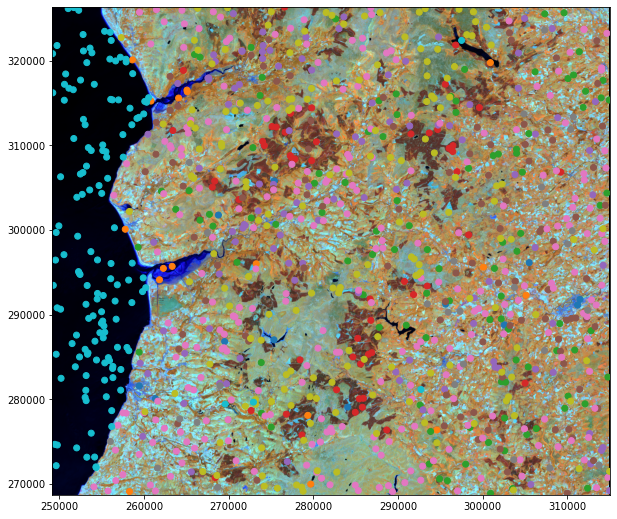

In [5]:
# Read image data
img_data, img_coords = rsgislib.tools.plotting.get_gdal_raster_mpl_imshow(
    input_img, bands=[8, 9, 3]
)

# Stretch the image data so is visualises appropriately and usefully
# In this case the resulting values will be between 0-1.
img_data_strch = rsgislib.tools.plotting.stdev_stretch_np_arr(img_data, no_data_val=0.0)

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(10, 10))
# Add the stretched image data to the plot and define the spatial
# extent so the axis labels are the coordinates.
ax.imshow(img_data_strch, extent=img_coords)

# Read points to geopandas dataframe
points_gdf = geopandas.read_file(ran_pts_vec_file)
# Plot the plots over the image data
# Note. Points are randomly coloured by class
points_gdf.plot(ax=ax, column='et_rl_cls')

# 5. Generate Stratified Points

In [6]:
strat_pts_vec_file = os.path.join(out_dir, "cls_acc_pts_strat.geojson")
strat_pts_vec_lyr = "cls_acc_pts_strat"

rsgislib.classification.generate_stratified_random_accuracy_pts(
    cls_img,
    strat_pts_vec_file,
    strat_pts_vec_lyr,
    "GeoJSON",
    rat_class_col="class_names",
    vec_class_col="et_rl_cls",
    vec_ref_col="ref_cls",
    num_pts=100,
    seed=42,
    del_exist_vec=True,
    use_pxl_lst=True,
)

Class: 'Artificial_Surfaces'
Class: 'Bare_Rock_Sand'
Class: 'Bracken'
Class: 'Conifer_Forest'
Class: 'Deciduous_Forest'
Class: 'Grass_Long'
Class: 'Grass_Short'
Class: 'NonPhoto_Veg'
Class: 'Scrub'
Class: 'Water'



## 5.1 Visualise the Points

Image Data Size: 3295 x 2880


<AxesSubplot:>

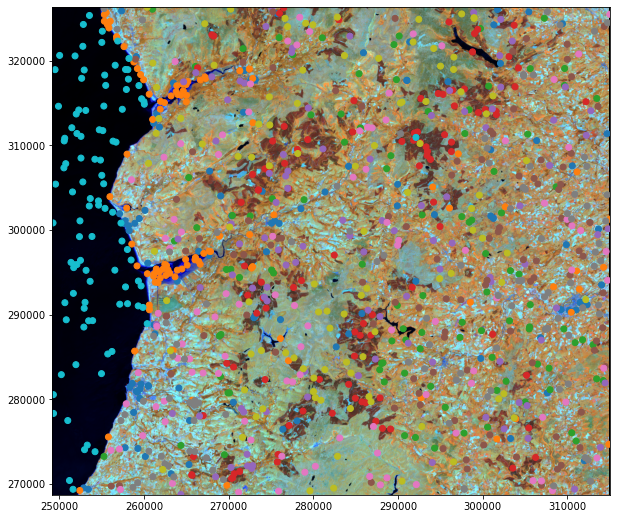

In [7]:
# Read image data
img_data, img_coords = rsgislib.tools.plotting.get_gdal_raster_mpl_imshow(
    input_img, bands=[8, 9, 3]
)

# Stretch the image data so is visualises appropriately and usefully
# In this case the resulting values will be between 0-1.
img_data_strch = rsgislib.tools.plotting.stdev_stretch_np_arr(img_data, no_data_val=0.0)

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(10, 10))
# Add the stretched image data to the plot and define the spatial
# extent so the axis labels are the coordinates.
ax.imshow(img_data_strch, extent=img_coords)

# Read points to geopandas dataframe
points_gdf = geopandas.read_file(strat_pts_vec_file)
# Plot the plots over the image data
# Note. Points are randomly coloured by class
points_gdf.plot(ax=ax, column='et_rl_cls')

# 6. Attribute Table Structure

As you can see below by printing the geopandas dataframe the vector layer as three attribute columns in addition to the geometry, 

The `et_rl_cls`column is the classification from the image column and the `ref_cls` column will have the reference class for the points. Initially `ref_cls` has been populated with the same value as the `et_rl_cls` column, this helps to speed up the assignment of `ref_cls` to the correct class used for the accuracy assessment as the majority of the points should already be correct if your map is good. The `Processed` column is to identify whether a point has been processed (i.e., the class checked) or not. A value of `0` is not processed (i.e., the default starting value) and a value of `1` means the point has been checked.

In [8]:
points_gdf = geopandas.read_file(strat_pts_vec_file)
points_gdf

,et_rl_cls,ref_cls,Processed,geometry
0,Artificial_Surfaces,Artificial_Surfaces,0,POINT Z (259427.332 301372.255 0.000)
1,Artificial_Surfaces,Artificial_Surfaces,0,POINT Z (301727.332 326052.255 0.000)
2,Artificial_Surfaces,Artificial_Surfaces,0,POINT Z (275047.332 300812.255 0.000)
3,Artificial_Surfaces,Artificial_Surfaces,0,POINT Z (252867.332 269552.255 0.000)
4,Artificial_Surfaces,Artificial_Surfaces,0,POINT Z (311567.332 291472.255 0.000)
...,...,...,...,...
995,Water,Water,0,POINT Z (250987.332 277512.255 0.000)
996,Water,Water,0,POINT Z (251467.332 312092.255 0.000)
997,Water,Water,0,POINT Z (255067.332 323492.255 0.000)
998,Water,Water,0,POINT Z (259987.332 315172.255 0.000)


# 7. QGIS ClassAccuracy Plugin

To facilitate the accuracy assessment, which can be significant amount of work, a QGIS plugin has been written ([https://github.com/remotesensinginfo/classaccuracy](https://github.com/remotesensinginfo/classaccuracy)). The plugin loads the shapefile and you then select the appropriate columns and it then guides you to each point, if the classification is correct you just press the `Enter` key or the 'Next Button', if the classification is incorrect then you can select the correct classification from the drop down box, or use the number keys and then press `Enter` or the 'Next Button' to continue to the next point.

Once you have completed all the points you can then calculate an error matrix from using the plugin. 

## 7.1 Plugin Installation

To install the plugin download the `ClassAccuracy_v1.0.0.zip` file:

[https://github.com/remotesensinginfo/classaccuracy/releases/download/qgis3_v1.0.0/ClassAccuracy_v1.0.0.zip](https://github.com/remotesensinginfo/classaccuracy/releases/download/qgis3_v1.0.0/ClassAccuracy_v1.0.0.zip)

Within QGIS go to the 'Plugins' menu and select 'Manage and Install Plugins...'.

![addplugin2qgis](./figures/addplugin2qgis.png)


You should then have a menu 'ClassAccuracy' within the 'Plugins' menu and a new icon on the toolbars.

There is a video showing the process of installation: https://www.youtube.com/watch?v=NJRdKpmujRo

## 7.2 Using the ClassAccuracy Plugin

There is also a video showing how to use the plugin: https://www.youtube.com/watch?v=npK-Ssq2AYY

The main steps are:

 1. Set the `Classified Column` (i.e., `et_rl_cls`). This is the column which as the classification you are basing the analysis from. 
 2. Set the `Output Column` (i.e., `ref_cls`). This will be the reference column against which the classification(s) will be compared to.
 3. Set the `Processed Column` (i.e., `Processed`). As described above, this column is used to define whether a point as be visited or not.
 4. Press `Start`. You will then be guided to the first point. 
 5. You may wish to change the image scale (at the bottom on the plugin window) so the imagery is at a useful scale for you to identify the points class.
 6. If the point is correct press `Enter` or press `Next` if incorrect then select class from the drop down list and then press `Next`. 
 
The analysis will be saved each time you go to the next point so if QGIS crashes or you close down the application you will be able to pick up from where you left off.
